### Podstawy przetwarzania dużych zbiorów danych - poziom 2 misje podstawowe
#### Paulina Szczepaniak 247798
#### Jan Gluźniewicz 247665

In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [234]:
df = pd.read_csv('df_merged_world_countries.csv')
df

,country_name,location_key,country_code,population,gdp_usd,area_sq_km,date,new_confirmed,cumulative_confirmed,new_deceased,...,area_sq_km_2,density_sq_km,growth_rate,world_population_percentage,gdp_in_1995,gdp_in_2000,gdp_in_2005,gdp_in_2010,gdp_in_2015,gdp_in_2016
0,Australia,AU,AUS,25499881,1.392681e+12,7741220,2022-01-18,72860.0,1836671.0,78.0,...,7692024,3.4032,1.0099,0.33,3.683917e+11,4.154462e+11,6.937641e+11,1.142877e+12,1.345383e+12,1.204616e+12
1,South Africa,ZA,ZAF,59308690,3.514316e+11,1219090,2022-01-02,3076.0,3475512.0,84.0,...,1221037,49.0517,1.0084,0.75,1.554603e+11,1.363619e+11,2.576714e+11,3.752981e+11,3.176107e+11,2.954562e+11
2,Peru,PE,PER,29381884,2.268481e+11,1285220,2021-03-30,10539.0,1577076.0,748.0,...,1285216,26.4933,1.0099,0.43,5.331279e+10,5.174475e+10,7.606061e+10,1.475289e+11,1.892121e+11,1.922073e+11
3,United States of America,US,USA,331002647,2.137442e+13,9831510,2021-09-08,167791.0,39489769.0,2068.0,...,9372610,36.0935,1.0038,4.24,7.664060e+12,1.028478e+13,1.309373e+13,1.496437e+13,1.812071e+13,1.862448e+13
4,Ethiopia,ET,ETH,114963583,9.610766e+10,1104300,2021-11-10,459.0,368106.0,22.0,...,1104300,111.7268,1.0257,1.55,7.663985e+09,8.242392e+09,1.240114e+10,2.993379e+10,6.446455e+10,7.237422e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227925,Croatia,HR,HRV,4076246,6.091759e+10,56590,2022-08-28,59.0,1211979.0,15.0,...,56594,71.2153,0.9927,0.05,2.238756e+10,2.177427e+10,4.541636e+10,5.966543e+10,4.892188e+10,5.071496e+10
227926,Austria,AT,AUT,8858775,4.551400e+11,83879,2022-07-27,9019.0,4756351.0,15.0,...,83871,106.5877,1.0020,0.11,2.410383e+11,1.967998e+11,3.159744e+11,3.918927e+11,3.820659e+11,3.908000e+11
227927,Argentina,AR,ARG,44938712,4.496634e+11,2780400,2021-10-10,382.0,5289547.0,15.0,...,2780400,16.3683,1.0052,0.57,2.580318e+11,2.842038e+11,1.987371e+11,4.236274e+11,5.847115e+11,5.454761e+11
227928,Sweden,SE,SWE,10230185,5.560253e+11,447430,2021-03-16,6786.0,731890.0,15.0,...,450295,23.4276,1.0079,0.13,2.640520e+11,2.598020e+11,3.890423e+11,4.883777e+11,4.979181e+11,5.144600e+11


In [235]:
kolumny = df.columns.tolist()  # Pobranie listy kolumn

print(kolumny)

['country_name', 'location_key', 'country_code', 'population', 'gdp_usd', 'area_sq_km', 'date', 'new_confirmed', 'cumulative_confirmed', 'new_deceased', 'cumulative_deceased', 'new_persons_vaccinated', 'cumulative_persons_vaccinated', 'new_tested', 'cumulative_tested', 'rank', 'country_territory_name', 'capital', 'continent', '2022_population', '2020_population', '2015_population', '2010_population', '2000_population', '1990_population', '1980_population', '1970_population', 'area_sq_km_2', 'density_sq_km', 'growth_rate', 'world_population_percentage', 'gdp_in_1995', 'gdp_in_2000', 'gdp_in_2005', 'gdp_in_2010', 'gdp_in_2015', 'gdp_in_2016']


### Część 1

##### Wartości odstające to wartości, które różnią się znacząco od większości danych w zbiorze. Mogą one wpłynąć na analizę danych, szczególnie na statystyki opisowe, takie jak średnia czy mediana. 

##### Pamiętaj o czytelności wykresów (tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje. 

##### Wykonaj wykresy pudełkowe (ang.box plot), które pozwolą na graficzną identyfikację wartości odstających poprzez przedstawienie kwartyli i wartości skrajnych w danych dotyczących:

##### 1.1. liczby nowych zachorowań

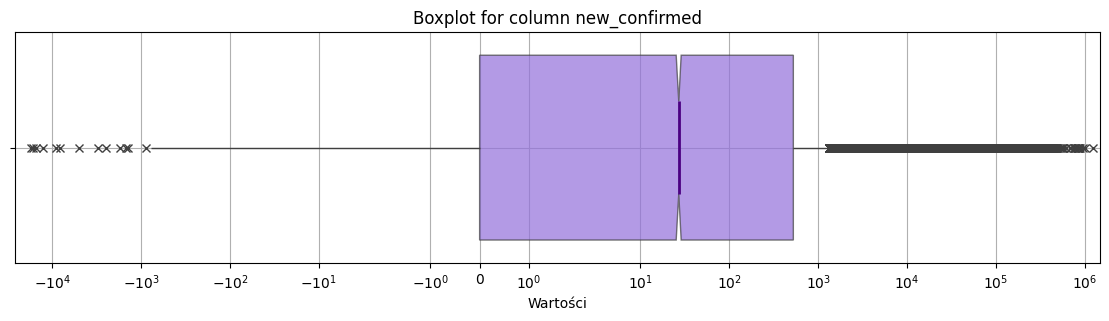

In [236]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_confirmed'], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column new_confirmed")
plt.xlabel("Wartości")
plt.xlim(df['new_confirmed'].min() * 0.8, df['new_confirmed'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.2. liczby nowych śmierci

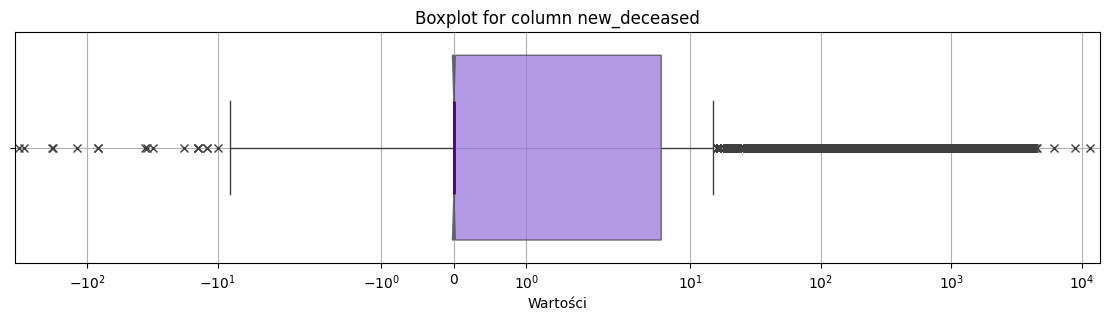

In [237]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_deceased'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column new_deceased")
plt.xlabel("Wartości")
plt.xlim(df['new_deceased'].min() * 0.8, df['new_deceased'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.3. liczby nowych szczepień

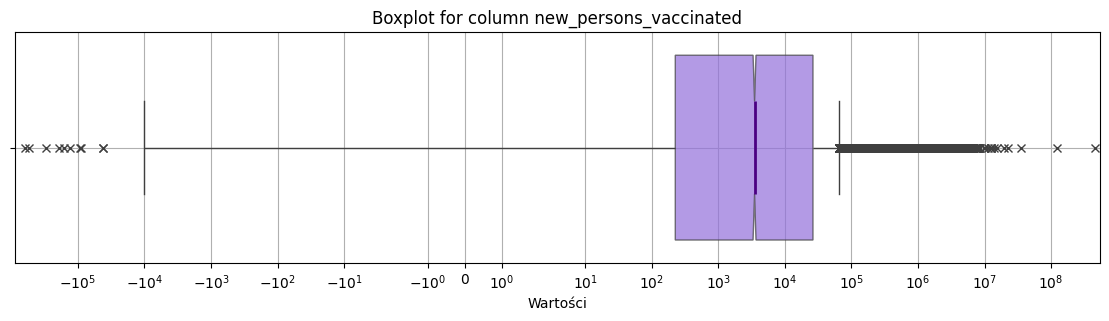

In [238]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_persons_vaccinated'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column new_persons_vaccinated")
plt.xlabel("Wartości")
plt.xlim(df['new_persons_vaccinated'].min() * 0.8, df['new_persons_vaccinated'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.4. populacji

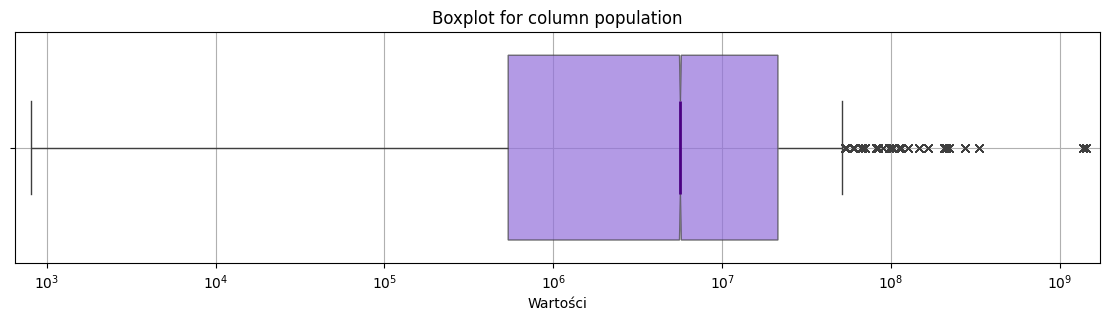

In [239]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['population'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column population")
plt.xlabel("Wartości")
plt.xlim(df['population'].min() * 0.8, df['population'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.5. PKB

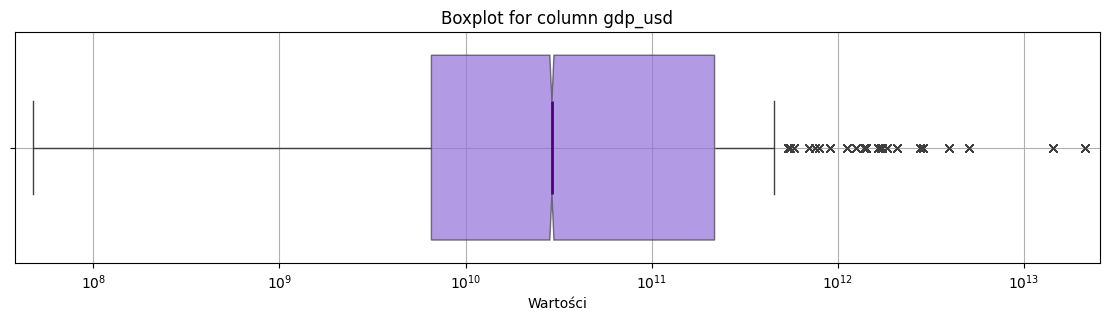

In [240]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['gdp_usd'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column gdp_usd")
plt.xlabel("Wartości")
plt.xlim(df['gdp_usd'].min() * 0.8, df['gdp_usd'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

##### 1.6. 4 innych różnych informacji, które uznasz za istotne

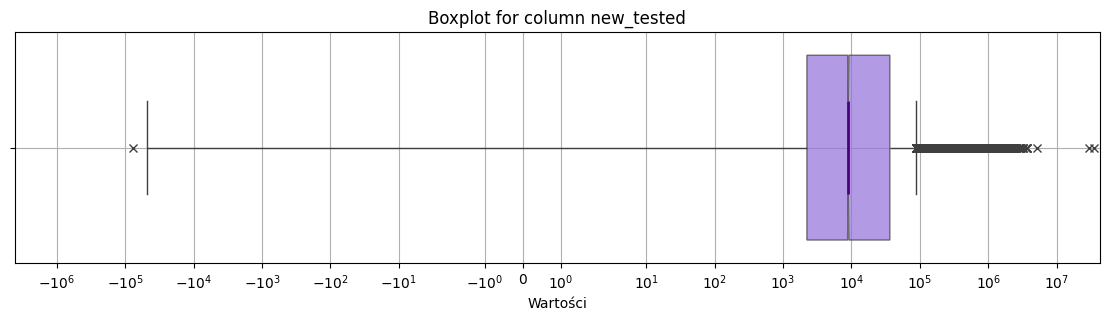

In [241]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['new_tested'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column new_tested")
plt.xlabel("Wartości")
plt.xlim(df['new_tested'].min() * 0.8, df['new_tested'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

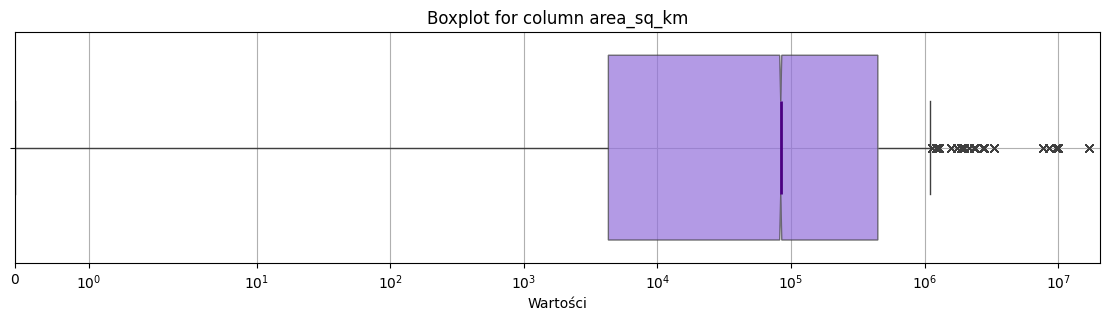

In [242]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['area_sq_km'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column area_sq_km")
plt.xlabel("Wartości")
plt.xlim(df['area_sq_km'].min() * 0.8, df['area_sq_km'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

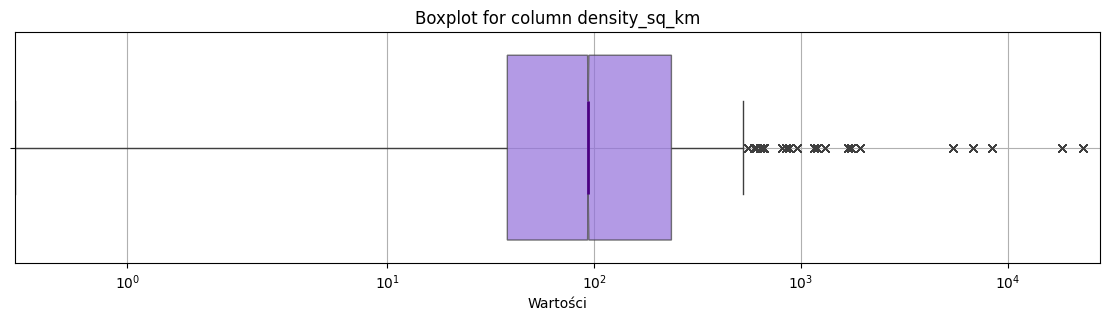

In [243]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['density_sq_km'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column density_sq_km")
plt.xlabel("Wartości")
plt.xlim(df['density_sq_km'].min() * 0.8, df['density_sq_km'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

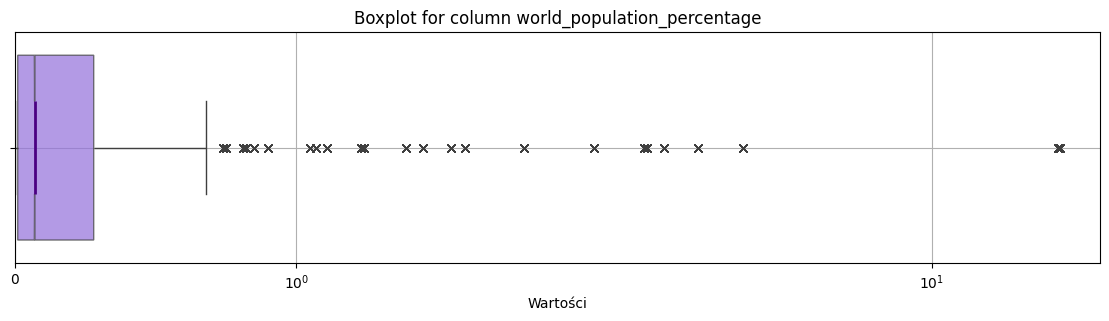

In [244]:
plt.figure(figsize=(14, 3))
sns.boxplot(x=df['world_population_percentage'], notch=True, showcaps=True, flierprops={"marker": "x"}, boxprops={"facecolor": "mediumpurple", "alpha": 0.7}, medianprops={"color": "indigo", "linewidth": 2})
plt.title(f"Boxplot for column world_population_percentage")
plt.xlabel("Wartości")
plt.xlim(df['world_population_percentage'].min() * 0.8, df['world_population_percentage'].max() * 1.2)
plt.grid(True)
plt.xscale("symlog")
plt.show()

### Część 3

##### Obliczenia statystyczne (m.in. średnia, mediana, moda, odchylenie standardowe) pozwolają na zrozumienie rozkładu danych oraz na identyfikację ewentualnych anomalii lub nietypowych wartości. 

##### Wykonaj następujące obliczenia:

##### 3.1. średnia liczba nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

In [245]:
selected_countries = ['Poland', 'Germany', 'Italy', 'France', 'Spain', 'United Kingdom', 'United States of America', 'Greece', 'Austria', 'Japan']
selected_columns = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated']
selected_year = 2021
selected_month = 3

df['date'] = pd.to_datetime(df['date'])
df_selected = df[(df['country_name'].isin(selected_countries)) & (df['date'].dt.year == selected_year) & (df['date'].dt.month == selected_month)]

mean_values_per_country = df_selected.groupby('country_name')[selected_columns].mean()

mean_values_per_country = mean_values_per_country.rename(columns={
    'new_confirmed': 'new_confirmed_mean', 
    'new_deceased': 'new_deceased_mean', 
    'new_persons_vaccinated': 'new_persons_vaccinated_mean'
})

mean_values_per_country['new_persons_vaccinated_mean'] = mean_values_per_country['new_persons_vaccinated_mean'].round(3)
print(mean_values_per_country.to_string())

                          new_confirmed_mean  new_deceased_mean  new_persons_vaccinated_mean
country_name                                                                                
Austria                          2811.741935          31.451613                    25854.839
France                          28659.838710         297.161290                   184449.710
Germany                         13254.645161         189.290323                   187529.323
Greece                           2416.193548          52.451613                    19276.259
Italy                           20909.677419         375.709677                   133815.516
Japan                            1364.516129          41.096774                    36896.913
Poland                          20777.161290         316.677419                    67051.935
Spain                            5413.838710          96.580645                   130783.762
United Kingdom                   5445.516129          95.838710       

##### 3.2. średnia zmiana liczby zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

##### 3.3. mediana liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

##### 3.4. odchylenie standardowe liczby nowych zachorowań, śmierci i szczepień dla co najmniej 10 wybranych krajów w wybranym miesiącu

##### 3.5. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a PKB co najmniej 10 wybranych krajów

##### 3.6. minimalna, średnia i maksymalna liczba nowych zachorowań, szczepień i śmierci, a populacja co najmniej 10 wybranych krajów.

##### Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.

### Część 4

##### Normalizacja danych polega na przeskalowaniu wartości zmiennych do określonego zakresu, np. [0, 1], co ułatwia porównanie różnych zmiennych między sobą.
##### Wykonaj normalizację dla następujących przypadków:
##### 4.1. liczba zachorowań na określoną przez Ciebie liczbę osób (np. na 1000 osób)

##### 4.2. liczba szczepień na określoną przez Ciebie liczbę osób (np. na 1000 osób)

##### 4.3. liczba zgonów na określoną przez Ciebie liczbę osób (np. na 1000 osób)

##### 4.4. co najmniej 4 dodatkowe, które uznasz za istotne

##### Przygotuj wykresy w celu porównania otrzymanych wyników. Pamiętaj o ich czytelności (typ wykresu, tytuł wykresu, podpisy osi, odpowiednie zakresy osi, itp.). Przeanalizuj otrzymane wizualizacje.